In [1]:
import os

os.chdir("../src")

from utils import data_utils

import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc


pd.set_option("display.max_columns", None)

import argparse

In [2]:
from src.models.components.omivae import OmiModel
from argparse import Namespace

from src.utils.paths import CONFIG_PATH
from types import SimpleNamespace
import yaml
import json

In [3]:
adata_norm = data_utils.load_anndata(
    mode="train", normalize=True, remove_batch_effect=False, target_hierarchy_level=-2
)

d:\dlls-hack\.venv\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


GCATTAGCATAAGCGG-1-s1d1    Naive CD20+ B IGKC+
TACAGGTGTTAGAGTA-1-s1d1             CD14+ Mono
AGGATCTAGGTCTACT-1-s1d1    Naive CD20+ B IGKC+
GTAGAAAGTGACACAG-1-s1d1                    HSC
TCCGAAAAGGATCATA-1-s1d1           Reticulocyte
                                  ...         
GAATCACCACGGAAGT-1-s4d9             Lymph prog
GCTGGGTGTACGGATG-1-s4d9           CD8+ T naive
TCGAAGTGTGACAGGT-1-s4d9                  T reg
GCAGGCTGTTGCATAC-1-s4d9           CD4+ T naive
ACGTAACAGGTCTACT-1-s4d9           CD8+ T naive
Name: cell_type, Length: 90261, dtype: category
Categories (45, object): ['B1 B IGKC+', 'B1 B IGKC-', 'CD4+ T CD314+ CD45RA+', 'CD4+ T activated', ..., 'dnT', 'gdT CD158b+', 'gdT TCRVD2+', 'pDC']
Second hierarchy mapping: GCATTAGCATAAGCGG-1-s1d1                       B Cells
TACAGGTGTTAGAGTA-1-s1d1                     Monocytes
AGGATCTAGGTCTACT-1-s1d1                       B Cells
GTAGAAAGTGACACAG-1-s1d1    Progenitors and Stem Cells
TCCGAAAAGGATCATA-1-s1d1             Erythroid

d:\dlls-hack\.venv\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
adata_norm.obs

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,GEX_pseudotime_order,Samplename,Site,DonorNumber,Modality,VendorLot,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train,second_hierarchy
TCAAGCACACCGGCTA-1-s1d1,2119,6.017303,1.172258,G2M,127,5362.0,9.0,CD4+ T activated integrinB7+,s1d1,NaN,NaN,site1_donor1_cite,site1,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train,T Cells
ACGTACAGTGAGAGGG-1-s2d5,1846,5.953992,1.519687,G2M,118,1417.0,5.0,CD14+ Mono,s2d5,NaN,NaN,site2_donor5_cite,site2,donor5,cite,3054457,16710,40,27.8,O+,White,HISPANIC OR LATINO,Female,False,Smoker,train,Monocytes
TACAACGCATAGCACT-1-s3d1,1524,11.220431,2.931581,S,133,2966.0,32.0,Proerythroblast,s3d1,0.973489,0.874869,site3_donor1_cite,site3,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train,Erythroid Lineage
GTAATGCCACAGCATT-1-s3d6,986,3.954438,0.460756,S,106,1087.0,8.0,Erythroblast,s3d6,0.909934,0.809380,site3_donor6_cite,site3,donor6,cite,3059371,28045,36,23.8,A+,Other Race,HISPANIC OR LATINO,Female,False,Nonsmoker,train,Erythroid Lineage
TCGATTTGTGTTGATC-1-s3d6,1233,4.216867,0.675681,G2M,100,415.0,4.0,CD16+ Mono,s3d6,NaN,NaN,site3_donor6_cite,site3,donor6,cite,3059371,28045,36,23.8,A+,Other Race,HISPANIC OR LATINO,Female,False,Nonsmoker,train,Monocytes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GATTCTTTCATTGTTC-1-s3d6,798,6.737401,0.353780,G2M,100,363.0,3.0,CD8+ T naive,s3d6,NaN,NaN,site3_donor6_cite,site3,donor6,cite,3059371,28045,36,23.8,A+,Other Race,HISPANIC OR LATINO,Female,False,Nonsmoker,train,T Cells
GTCGCGACAGTTCCAA-1-s3d1,357,1.405152,0.408550,S,129,1590.0,25.0,Erythroblast,s3d1,0.967875,0.929695,site3_donor1_cite,site3,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train,Erythroid Lineage
TACGTCCTCCCTTGTG-1-s2d1,1297,7.581700,1.040512,G1,115,1199.0,5.0,CD14+ Mono,s2d1,NaN,NaN,site2_donor1_cite,site2,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train,Monocytes
TCTCAGCAGGATGAGA-1-s3d1,877,4.774381,1.349673,G2M,133,3342.0,22.0,Plasma cell IGKC+,s3d1,NaN,NaN,site3_donor1_cite,site3,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train,Plasma Cells


In [5]:
data_utils.get_simple_dataloader_from_anndata(
    adata_norm,
    True,
    32,
)

RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 3728828900 bytes.

In [4]:
def load_config(args) -> SimpleNamespace:
    def load_object(dct):
        return SimpleNamespace(**dct)

    with open(CONFIG_PATH / args.method / f"{args.config}.yaml") as file:
        config_dict = yaml.safe_load(file)
    config_namespace = json.loads(json.dumps(config_dict), object_hook=load_object)
    return config_namespace

In [5]:
cfg = load_config(Namespace(method="omivae", config="omiae-simple"))
omimodel = OmiModel(cfg)

first_modality_dim set as 13953
first_modality_hidden_dim set as 50
second_modality_hidden_dim set as 10
first_modality_embedding_dim set as 50
second_modality_embedding_dim set as 10
decoder_in_dim set as 20
kld_loss_coef set as 1


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [6]:
omimodel.train(adata_norm)

batch_size 128


d:\dlls-hack\.venv\Lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 710 K 
1 | decoder | Sequential | 721 K 
---------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.726     Total estimated model params size (MB)
d:\dlls-hack\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Epoch 0:   1%|          | 3/517 [00:00<00:26, 19.09it/s, v_num=8, Train loss_step=0.174, Train recon_loss_step=0.174]

d:\dlls-hack\.venv\Lib\site-packages\pytorch_lightning\loops\optimization\automatic.py:132: `training_step` returned `None`. If this was on purpose, ignore this warning...


Epoch 11:  98%|█████████▊| 508/517 [00:09<00:00, 51.80it/s, v_num=8, Train loss_step=0.173, Train recon_loss_step=0.173, Train loss_epoch=0.170, Train recon_loss_epoch=0.170]

d:\dlls-hack\.venv\Lib\site-packages\pytorch_lightning\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [10]:
import torch

data = torch.tensor(adata_norm.X.toarray())

In [11]:
latent_embeddings = omimodel.model._encode(data)

In [12]:
latent_embeddings.shape

torch.Size([66175, 10])

C:\Users\przem\AppData\Local\Temp\ipykernel_4440\2128738621.py:1: ImplicitModificationWarning: Setting element `.obsm['latent_embeddings']` of view, initializing view as actual.
  adata_norm.obsm['latent_embeddings'] = latent_embeddings.detach().numpy()
d:\dlls-hack\.venv\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
d:\dlls-hack\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


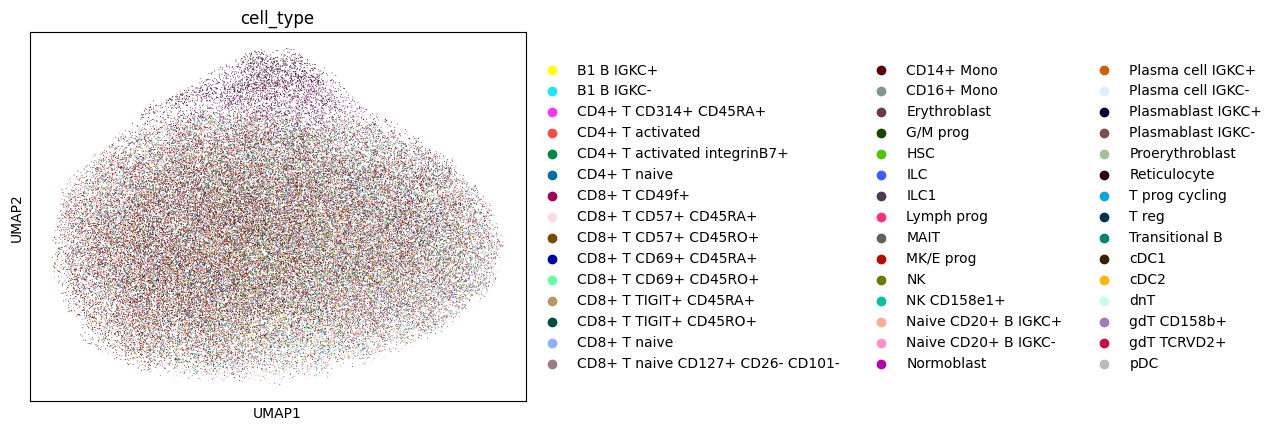

In [13]:
adata_norm.obsm["latent_embeddings"] = latent_embeddings.detach().numpy()

sc.pp.neighbors(adata_norm, n_neighbors=10, use_rep="latent_embeddings")
sc.tl.umap(adata_norm)
sc.pl.umap(adata_norm, color="cell_type")